In [2]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

# ATPOS

In [99]:
aptos_path = 'data/aptos2019-blindness-detection'

tr_path = os.path.join(aptos_path, 'train_images')
ts_path = os.path.join(aptos_path, 'test_images')
print(len(os.listdir(tr_path)))
print(len(os.listdir(ts_path)))

3662
1928


In [82]:
train_df = pd.read_csv(os.path.join(aptos_path, "train.csv"))
# test_df에는 label 없음

In [83]:
train_df.head()

id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0

In [92]:
val_cnts = train_df['diagnosis'].value_counts()

In [98]:
# normal : abnormal = 0.97
val_cnts[0] / sum([val_cnts[1], val_cnts[2], val_cnts[3], val_cnts[4]])

0.971997845988153

In [102]:
# non proliferative DR : proliferative DR = 5.3 : 1
sum([val_cnts[1], val_cnts[2], val_cnts[3]]) / val_cnts[4]

5.294915254237288

- 0 - No DR
- 1 - Mild
- 2 - Moderate
- 3 - Severe
- 4 - Proliferative DR

In [14]:
DR_0_ids = train_df[train_df['diagnosis'] == 0]['id_code']
DR_1_ids = train_df[train_df['diagnosis'] == 1]['id_code']
DR_2_ids = train_df[train_df['diagnosis'] == 2]['id_code']
DR_3_ids = train_df[train_df['diagnosis'] == 3]['id_code']
DR_4_ids = train_df[train_df['diagnosis'] == 4]['id_code']

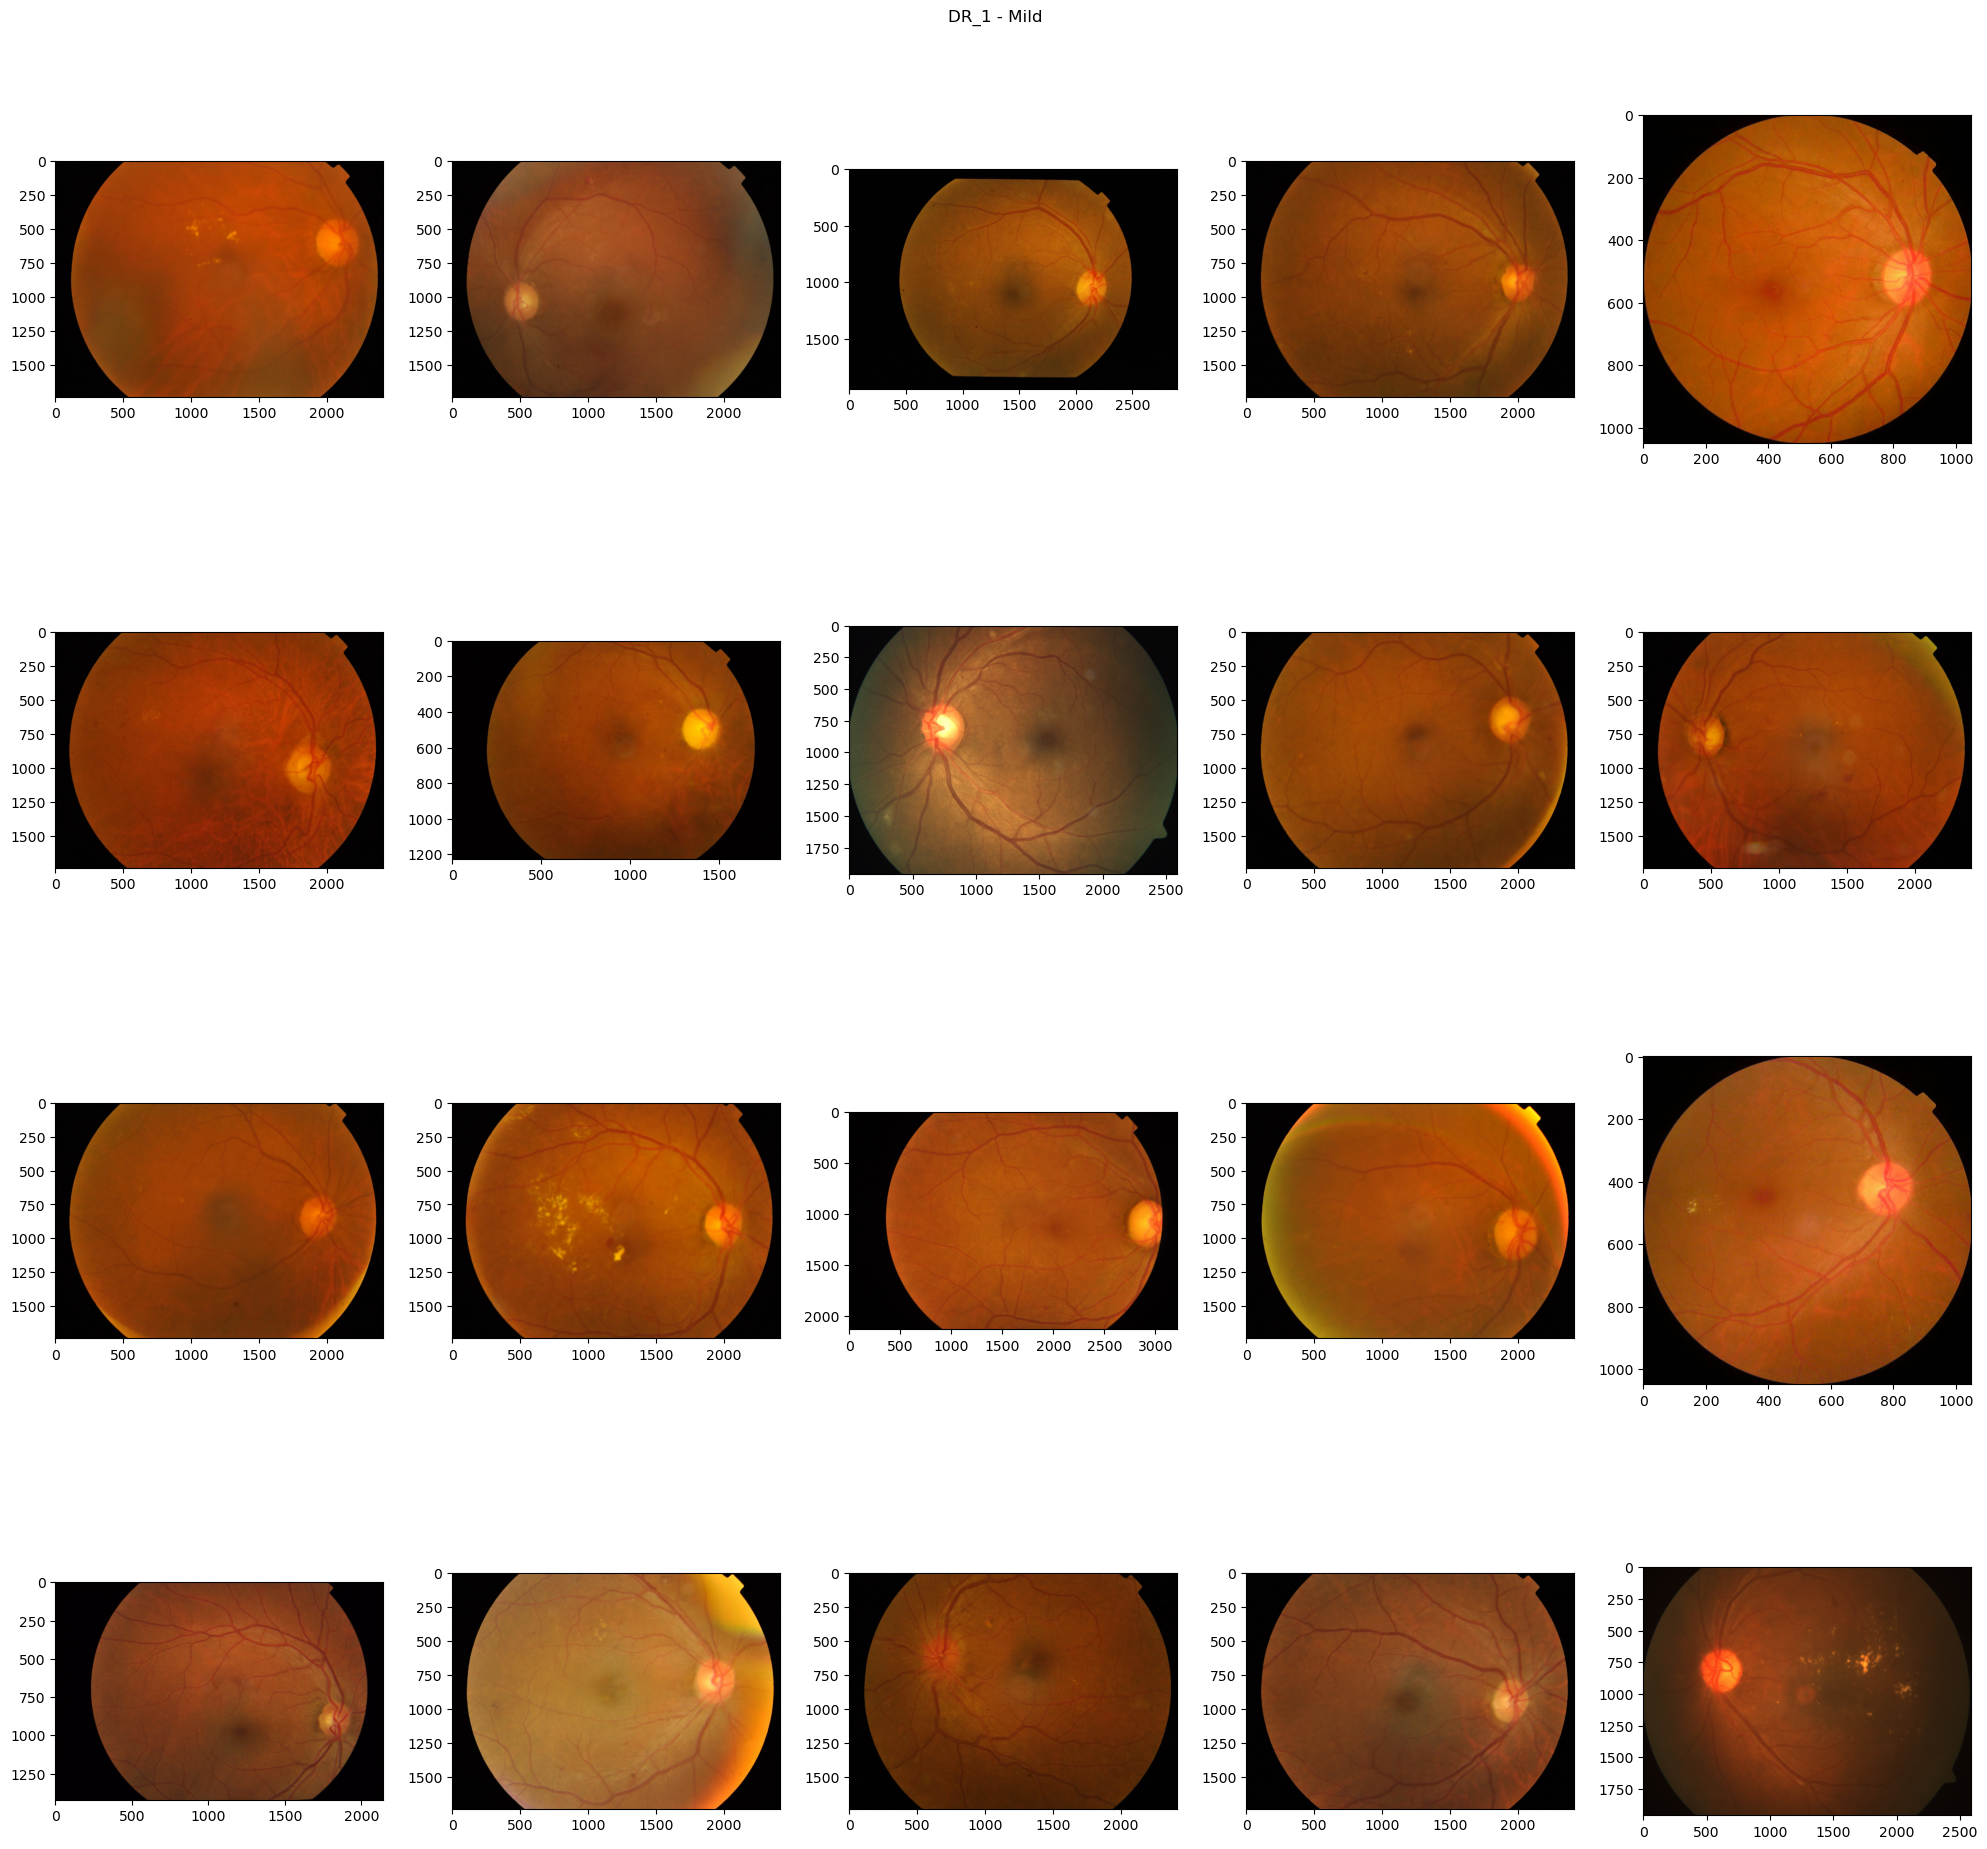

In [53]:
samples = DR_1_ids.sample(20).values

fig, axes = plt.subplots(4, 5, figsize=(20, 20))
axes = axes.flatten()

fig.suptitle("DR_1 - Mild") 

for i, sample in enumerate(samples):
  img = cv2.imread(os.path.join(tr_path, sample + '.png')) 
  axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  
fig.tight_layout()
plt.show()

# RFMID

In [3]:
import os

RFMID_path = 'data/RFMID'

tr_path = os.path.join(RFMID_path, 'Training_Set/Training_Set')
ts_path = os.path.join(RFMID_path, 'Test_Set/Test_Set')
val_path = os.path.join(RFMID_path, 'Evaluation_Set/Evaluation_Set')

print(os.listdir(tr_path))
print(os.listdir(ts_path))
print(os.listdir(val_path))

['RFMiD_Training_Labels.csv', 'Training']
['RFMiD_Testing_Labels.csv', 'Test']
['RFMiD_Validation_Labels.csv', 'Validation']


In [5]:
import pandas as pd

train_df = pd.read_csv(os.path.join(tr_path, "RFMiD_Training_Labels.csv"))
val_df = pd.read_csv(os.path.join(val_path, "RFMiD_Validation_Labels.csv"))
test_df = pd.read_csv(os.path.join(ts_path, "RFMiD_Testing_Labels.csv"))

display(train_df.head(), val_df.head(), test_df.head())
print(train_df.shape, val_df.shape, test_df.shape)


# 전부 레이블 존재함
# test set은 진짜 검증할 때만 사용하기

# 비율은 Tr : Val : Ts = 1920 : 640 : 640

ID  Disease_Risk  DR  ARMD  MH  DN  MYA  BRVO  TSLN  ERM  ...  CME  PTCR  \
0   1             1   1     0   0   0    0     0     0    0  ...    0     0   
1   2             1   1     0   0   0    0     0     0    0  ...    0     0   
2   3             1   1     0   0   0    0     0     0    0  ...    0     0   
3   4             1   0     0   1   0    0     0     0    0  ...    0     0   
4   5             1   1     0   0   0    0     0     0    0  ...    0     0   

   CF  VH  MCA  VS  BRAO  PLQ  HPED  CL  
0   0   0    0   0     0    0     0   0  
1   0   0    0   0     0    0     0   0  
2   0   0    0   0     0    0     0   0  
3   0   0    0   0     0    0     0   0  
4   0   0    0   0     0    0     0   0  

[5 rows x 47 columns]

ID  Disease_Risk  DR  ARMD  MH  DN  MYA  BRVO  TSLN  ERM  ...  CME  PTCR  \
0   1             1   1     0   0   0    0     0     1    0  ...    0     0   
1   2             1   0     0   0   0    0     0     0    0  ...    0     0   
2   3             1   0     0   0   0    0     0     0    0  ...    0     0   
3   4             1   0     0   0   0    0     0     0    0  ...    0     0   
4   5             1   0     0   0   0    0     0     0    0  ...    0     0   

   CF  VH  MCA  VS  BRAO  PLQ  HPED  CL  
0   0   0    0   0     0    0     0   0  
1   0   0    0   0     0    0     0   0  
2   0   0    0   0     0    0     0   0  
3   0   0    0   0     0    0     0   0  
4   0   0    0   0     0    0     0   0  

[5 rows x 47 columns]

ID  Disease_Risk  DR  ARMD  MH  DN  MYA  BRVO  TSLN  ERM  ...  CME  PTCR  \
0   1             1   1     0   0   0    0     0     1    0  ...    0     0   
1   2             1   1     0   0   0    0     1     0    0  ...    0     0   
2   3             1   1     0   0   0    0     0     0    0  ...    0     0   
3   4             1   0     0   0   0    0     0     0    0  ...    0     0   
4   5             1   0     0   0   0    0     0     0    0  ...    0     0   

   CF  VH  MCA  VS  BRAO  PLQ  HPED  CL  
0   0   0    0   0     0    0     0   0  
1   0   0    0   0     0    0     0   0  
2   0   0    0   0     0    0     0   0  
3   0   0    0   0     0    0     0   0  
4   0   0    0   0     0    0     0   0  

[5 rows x 47 columns]

(1920, 47) (640, 47) (640, 47)


In [105]:
# tr
# 정상 : 환자 = 1 : 3.8
print(train_df[train_df['Disease_Risk'] == 1].shape[0] / train_df[train_df['Disease_Risk'] == 0].shape[0])

# val
# 정상 : 환자 = 1 : 3.8
print(val_df[val_df['Disease_Risk'] == 1].shape[0] / val_df[val_df['Disease_Risk'] == 0].shape[0])

3.7880299251870326
3.7761194029850746


In [106]:
# tr
# 병마다 비율 살펴보기 , 전체에서 어느정도 차지하는지

cols = train_df.columns.to_list()
disease_list = cols[2:]

disease_ratio = {}

for disease in disease_list:
  cnt = train_df[train_df[disease]==1].shape[0]
  ratio = round(cnt / train_df.shape[0] * 100, 3)
  disease_ratio[disease] = ratio
  
disease_ratio

{'DR': 19.583,
 'ARMD': 5.208,
 'MH': 16.51,
 'DN': 7.187,
 'MYA': 5.26,
 'BRVO': 3.802,
 'TSLN': 9.688,
 'ERM': 0.729,
 'LS': 2.448,
 'MS': 0.781,
 'CSR': 1.927,
 'ODC': 14.688,
 'CRVO': 1.458,
 'TV': 0.312,
 'AH': 0.833,
 'ODP': 3.385,
 'ODE': 3.021,
 'ST': 0.26,
 'AION': 0.885,
 'PT': 0.573,
 'RT': 0.729,
 'RS': 2.24,
 'CRS': 1.667,
 'EDN': 0.781,
 'RPEC': 1.146,
 'MHL': 0.573,
 'RP': 0.312,
 'CWS': 0.156,
 'CB': 0.052,
 'ODPM': 0.0,
 'PRH': 0.104,
 'MNF': 0.156,
 'HR': 0.0,
 'CRAO': 0.104,
 'TD': 0.156,
 'CME': 0.208,
 'PTCR': 0.26,
 'CF': 0.156,
 'VH': 0.052,
 'MCA': 0.052,
 'VS': 0.052,
 'BRAO': 0.104,
 'PLQ': 0.052,
 'HPED': 0.052,
 'CL': 0.052}

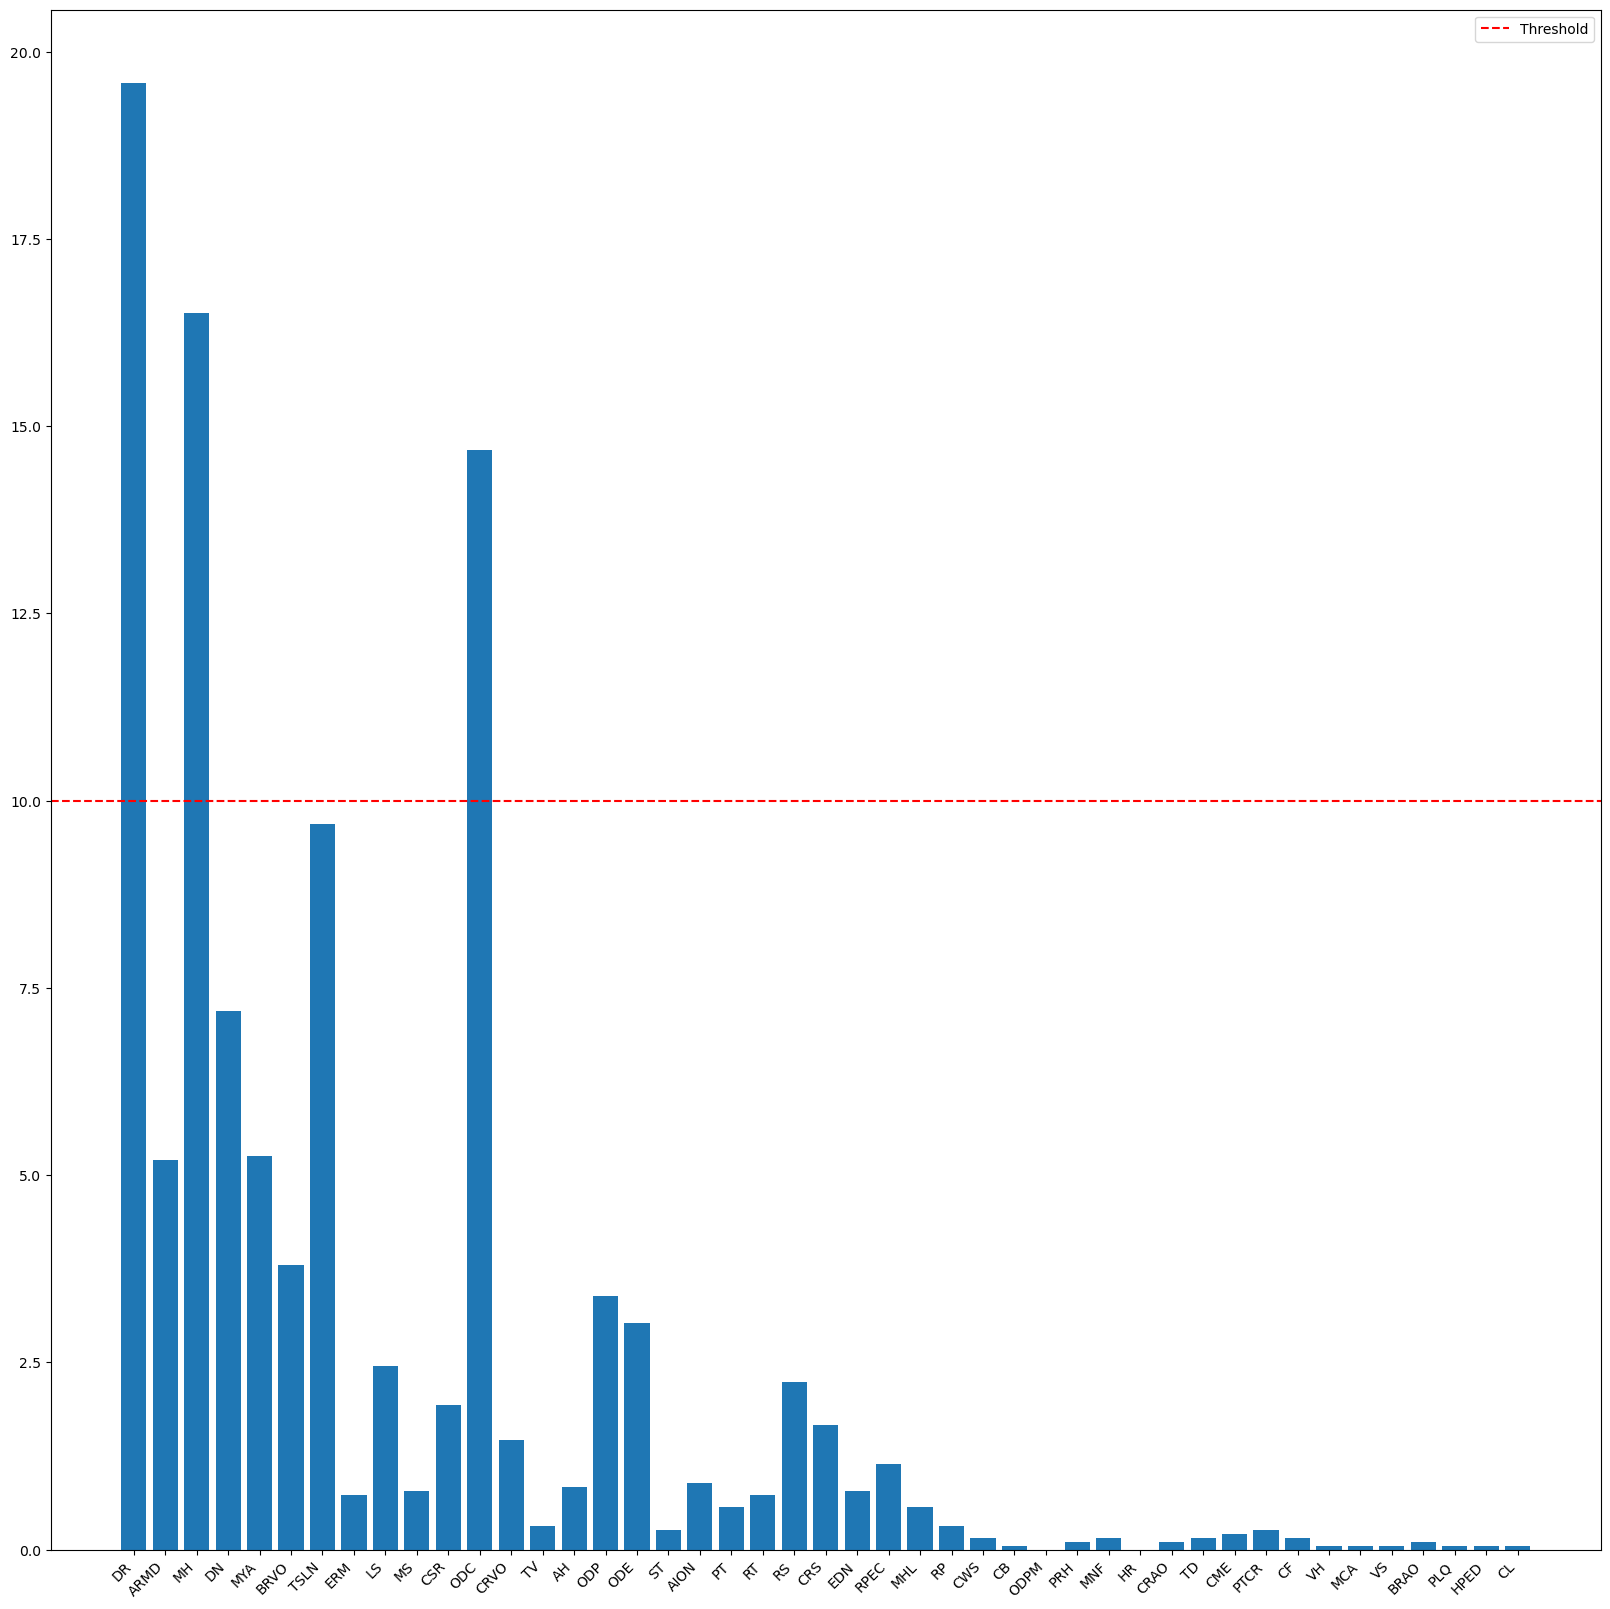

In [107]:
plt.figure(figsize=(20, 20))
plt.bar(disease_ratio.keys(), disease_ratio.values())
plt.xticks(rotation=45, ha='right')

threshold = 10.0
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')

plt.legend()
plt.show()

자주 발생하는 병종과 희귀병종을 구분할 수 있겠다. (기준은 다소 주관적일 듯)

DR, MH, ODC가 해당되겠다.

In [79]:
# val
# 병마다 비율 살펴보기 , 전체에서 어느정도 차지하는지

cols = val_df.columns.to_list()
disease_list = cols[2:]

disease_ratio = {}

for disease in disease_list:
  cnt = val_df[val_df[disease]==1].shape[0]
  ratio = round(cnt / val_df.shape[0] * 100, 3)
  disease_ratio[disease] = ratio
  
disease_ratio

{'DR': 20.625,
 'ARMD': 5.938,
 'MH': 15.937,
 'DN': 7.187,
 'MYA': 5.312,
 'BRVO': 3.594,
 'TSLN': 10.156,
 'ERM': 1.094,
 'LS': 2.656,
 'MS': 0.781,
 'CSR': 1.719,
 'ODC': 11.25,
 'CRVO': 1.25,
 'TV': 0.312,
 'AH': 0.625,
 'ODP': 4.062,
 'ODE': 3.281,
 'ST': 0.625,
 'AION': 0.781,
 'PT': 0.312,
 'RT': 0.938,
 'RS': 2.188,
 'CRS': 1.719,
 'EDN': 0.781,
 'RPEC': 0.938,
 'MHL': 0.469,
 'RP': 0.312,
 'CWS': 0.469,
 'CB': 0.0,
 'ODPM': 0.312,
 'PRH': 0.156,
 'MNF': 0.0,
 'HR': 0.0,
 'CRAO': 0.312,
 'TD': 0.312,
 'CME': 0.156,
 'PTCR': 0.156,
 'CF': 0.312,
 'VH': 0.312,
 'MCA': 0.0,
 'VS': 0.469,
 'BRAO': 0.312,
 'PLQ': 0.156,
 'HPED': 0.0,
 'CL': 0.0}

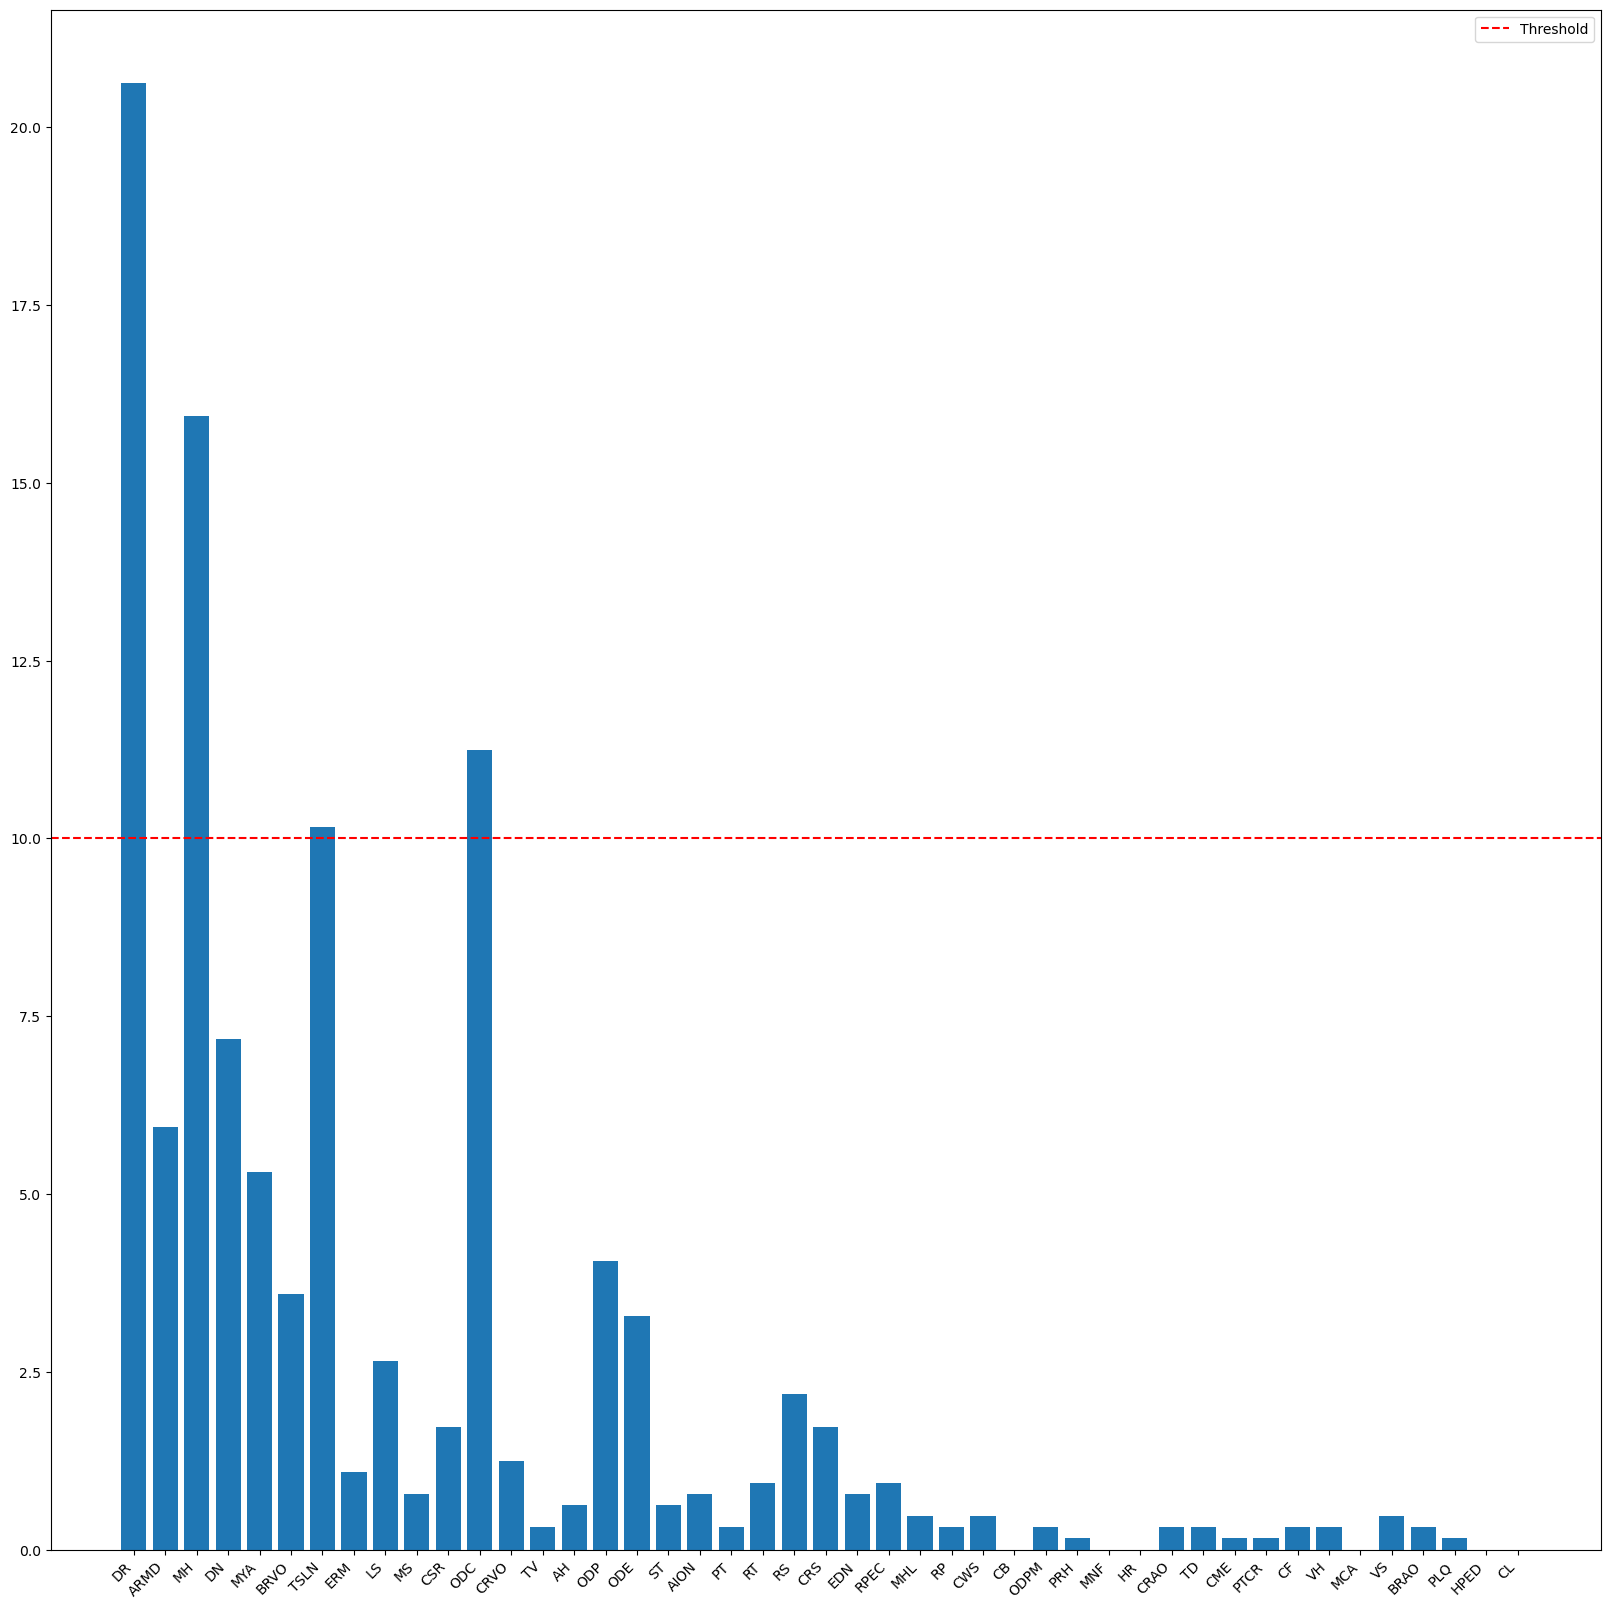

In [80]:
plt.figure(figsize=(20, 20))
plt.bar(disease_ratio.keys(), disease_ratio.values())
plt.xticks(rotation=45, ha='right')

threshold = 10.0
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')

plt.legend()
plt.show()

val 에서는 TSLM도 10% 넘네

In [109]:
# DR 환자 376명
train_df[train_df['DR']==1 & train_df]

ID  Disease_Risk  DR  ARMD  MH  DN  MYA  BRVO  TSLN  ERM  ...  CME  \
0        1             1   1     0   0   0    0     0     0    0  ...    0   
1        2             1   1     0   0   0    0     0     0    0  ...    0   
2        3             1   1     0   0   0    0     0     0    0  ...    0   
4        5             1   1     0   0   0    0     0     0    0  ...    0   
17      18             1   1     0   0   0    0     0     0    0  ...    0   
...    ...           ...  ..   ...  ..  ..  ...   ...   ...  ...  ...  ...   
1686  1687             1   1     0   0   0    0     0     0    0  ...    0   
1692  1693             1   1     0   0   0    0     0     0    0  ...    0   
1724  1725             1   1     0   0   0    0     0     1    0  ...    0   
1725  1726             1   1     0   0   0    0     0     1    0  ...    0   
1916  1917             1   1     0   0   0    0     0     0    0  ...    0   

      PTCR  CF  VH  MCA  VS  BRAO  PLQ  HPED  CL  
0        0   0   0    0   0     0    0     0   0  
1        0   0   0    0   0     0    0     0   0  
2        0   0   0    0   0     0    0     0   0  
4        0   0   0    0   0     0    0     0   0  
17       0   0   0    0   0     0    0     0   0  
...    ...  ..  ..  ...  ..   ...  ...   ...  ..  
1686     0   0   0    0   0     0    0     0   0  
1692     0   0   0    0   0     0    0     0   0  
1724     0   0   0    0   0     0    0     0   0  
1725     0   0   0    0   0     0    0     0   0  
1916     0   0   0    0   0     0    0     0   0  

[376 rows x 47 columns]

In [12]:
DR_ids = train_df[train_df['DR'] == 1]['ID']

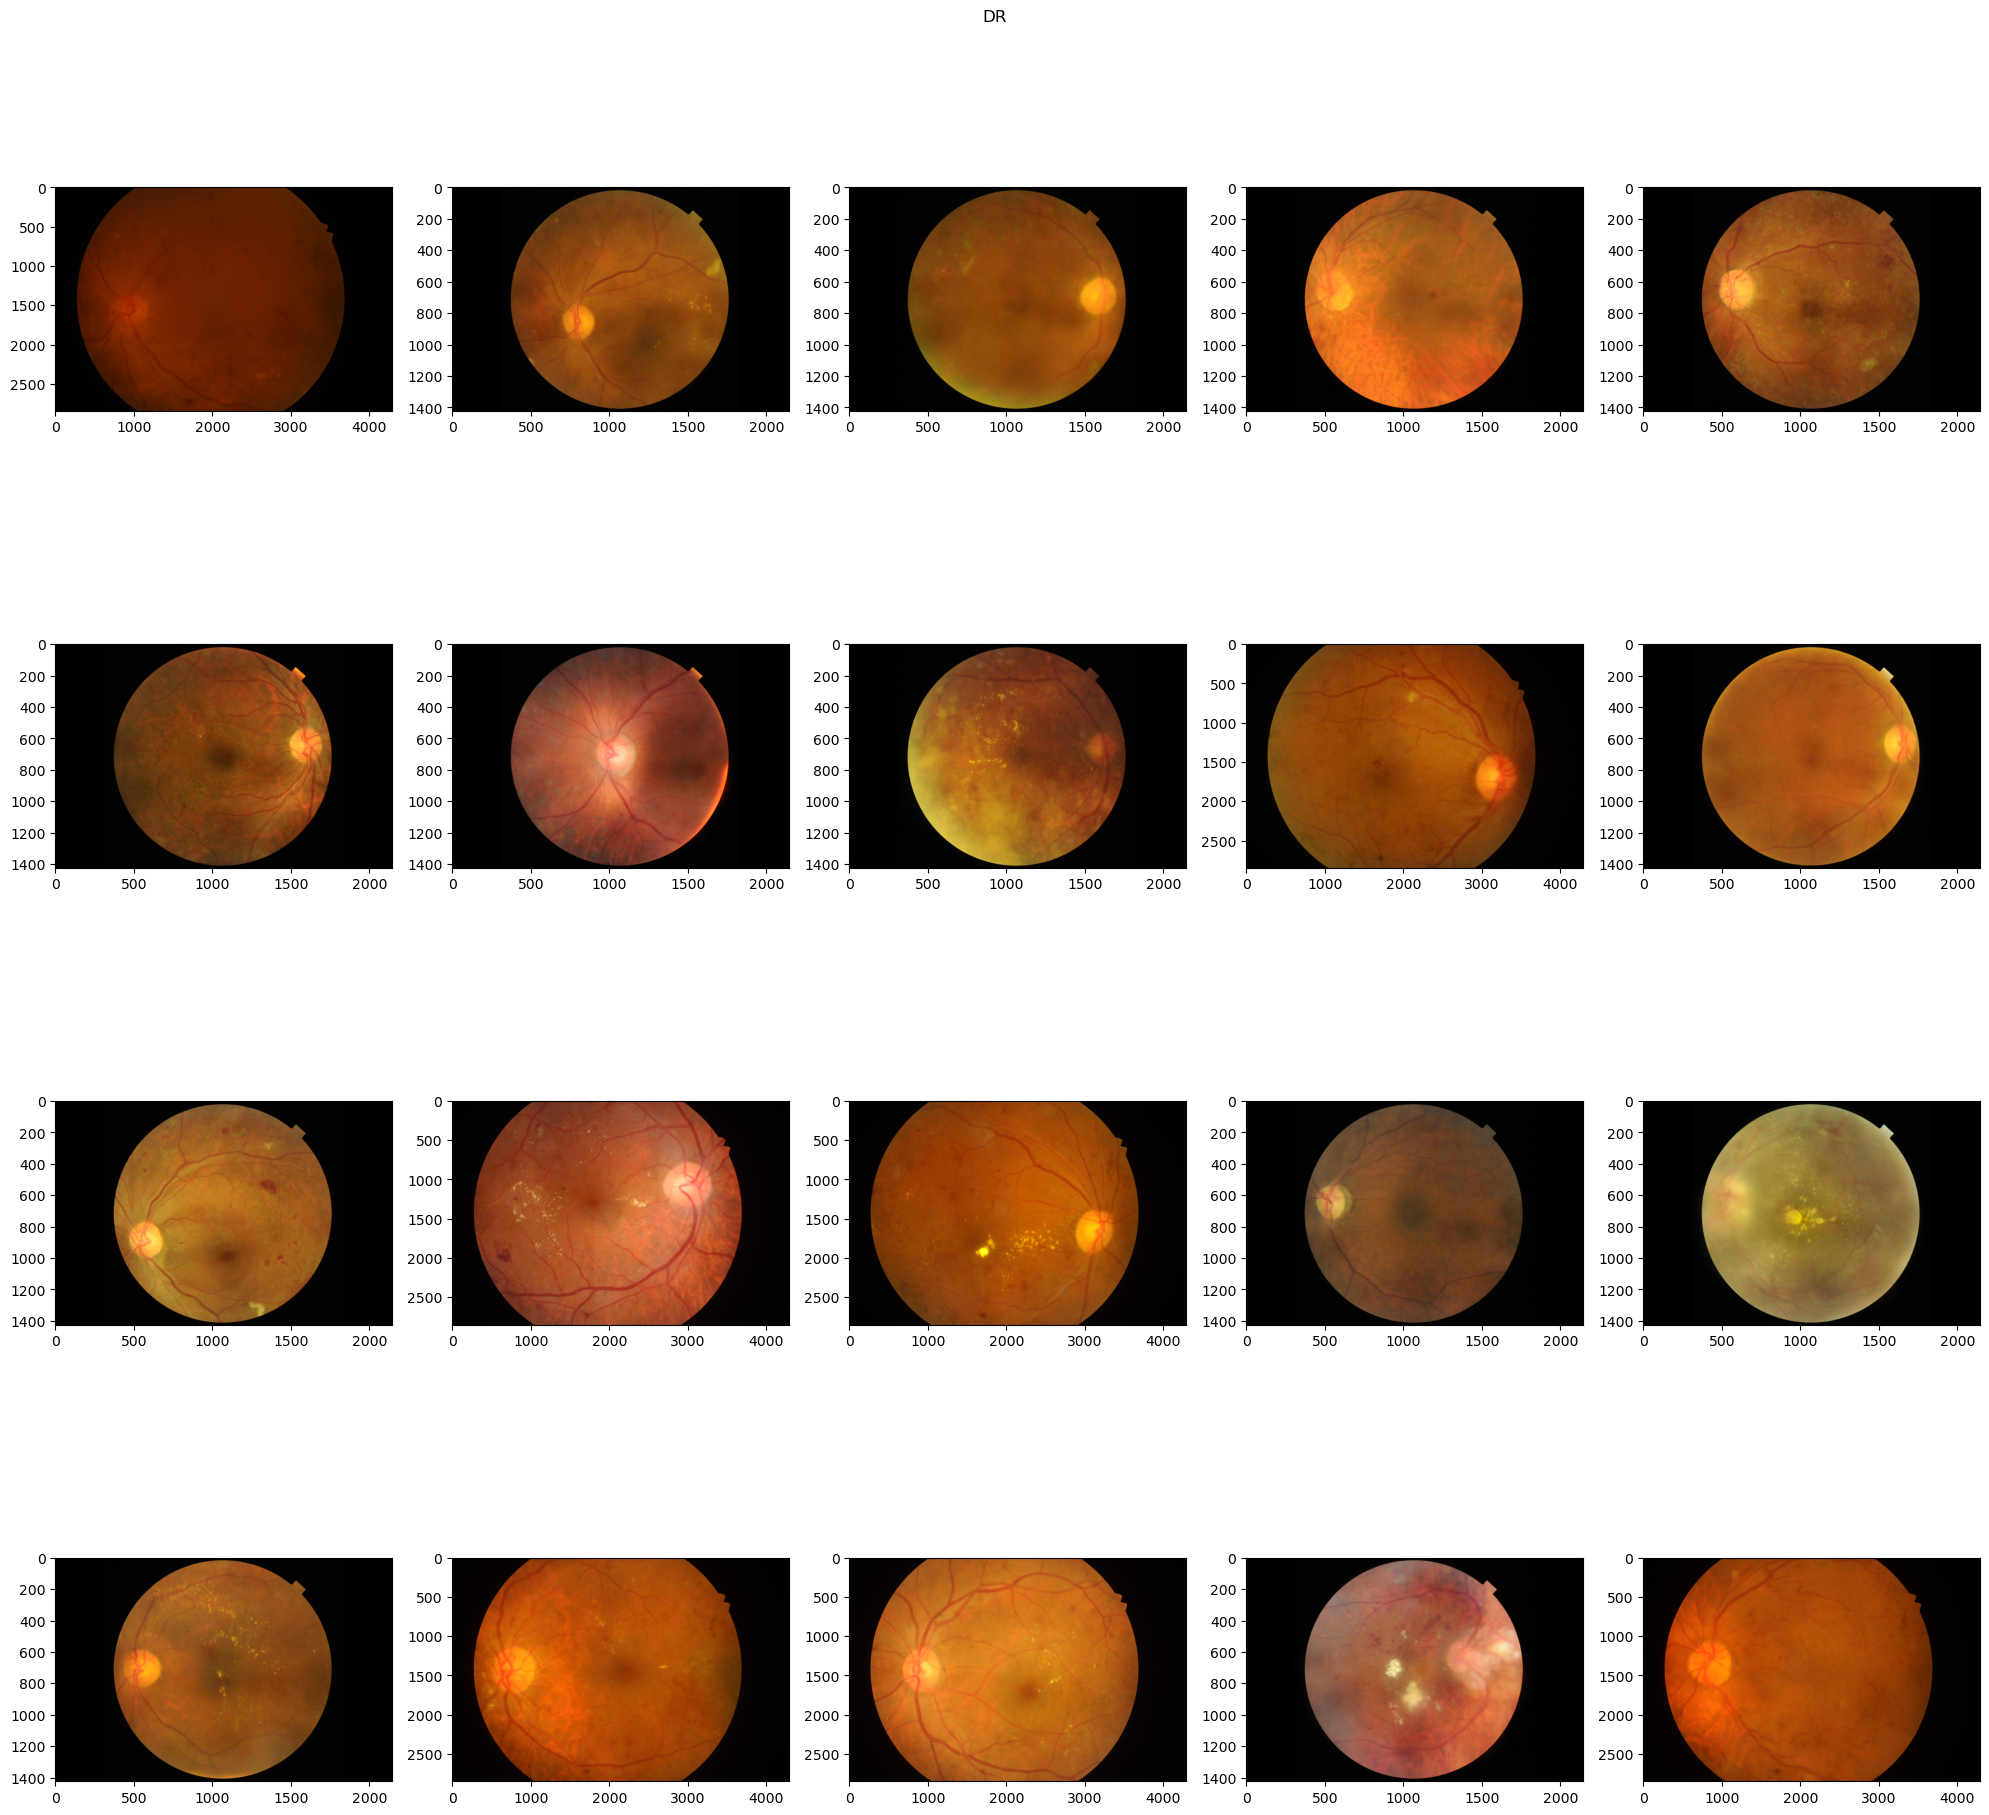

In [31]:
samples = DR_ids.sample(20).values

fig, axes = plt.subplots(4, 5, figsize=(20, 20))
axes = axes.flatten()

fig.suptitle("DR") 

for i, sample in enumerate(samples):
  img = cv2.imread(os.path.join(tr_path + '/Training', str(sample) + '.png')) 
  axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  
fig.tight_layout()
plt.show()

# Mask별 크기